In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('tsv.csv')

df['date_of_infraction']= pd.to_datetime(df['date_of_infraction'])

df['Count Date'] = df['Count Date'].str.replace('*', '').str.replace(',', '')

df['Latitude'] = df['Latitude'].str.replace('*', '').str.replace(',', '')

df['Longitude'] = df['Longitude'].str.replace('*', '').str.replace(',', '')

df['Longitude'] = df['Longitude'].str.replace('*', '').str.replace(',', '')

df['8 Peak Hr Vehicle Volume'] = df['8 Peak Hr Vehicle Volume'].str.replace('*', '').str.replace(',', '')
df['8 Peak Hr Pedestrian Volume'] = df['8 Peak Hr Pedestrian Volume'].str.replace('*', '').str.replace(',', '')
df['Activation Date'] = df['Activation Date'].str.replace('*', '').str.replace(',', '')
df['TCS '] = df['TCS '].str.replace('*', '').str.replace(',', '')

df['Count Date']= pd.to_datetime(df['Count Date'])

df['Activation Date']= pd.to_datetime(df['Activation Date'])

df

df1 = df[['date_of_infraction','set_fine_amount','time_of_infraction','location2','Latitude','Longitude','Count Date','8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume']]

df1

df1['date_of_infraction_year'] = df1['date_of_infraction'].dt.year
df1['date_of_infraction_month'] = df1['date_of_infraction'].dt.month
df1['date_of_infraction_week'] = df1['date_of_infraction'].dt.week
df1['date_of_infraction_day'] = df1['date_of_infraction'].dt.day
df1['date_of_infraction_dayofweek'] = df1['date_of_infraction'].dt.dayofweek

df1['Count Date_year'] = df1['Count Date'].dt.year
df1['Count Date_month'] = df1['Count Date'].dt.month
df1['Count Date_week'] = df1['Count Date'].dt.week
df1['Count Date_day'] = df1['Count Date'].dt.day
df1['Count Date_dayofweek'] = df1['Count Date'].dt.dayofweek

df1

df1 = df1.drop('date_of_infraction',axis = 1)
df1 = df1.drop('Count Date',axis = 1)
df1 = df1.drop('location2',axis = 1)


df1 = df1.dropna(how='all')

df1["8 Peak Hr Vehicle Volume"] = df1["8 Peak Hr Vehicle Volume"].astype(str).astype(int)

df1["8 Peak Hr Pedestrian Volume"] = df1["8 Peak Hr Pedestrian Volume"].astype(str).astype(int)

df1['hour_sin'] = np.sin(2 * np.pi * df1['time_of_infraction']/23.0)


df1['hour_cos'] = np.cos(2 * np.pi * df1['time_of_infraction']/23.0)


df1["Latitude"] = df1.Latitude.astype(float)


df1["Longitude"] = df1.Latitude.astype(float)


np.where(df1.values >= np.finfo(np.float64).max)


df1 = df1.dropna() 

pd.isnull(df1).sum() > 0

X=df1.drop(columns=['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume'])
y= df1[['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

!pip install tensorflow

!pip install keras

/home/ec2-user/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/ipykernel/__main__.py:32: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().we

In [2]:
df1.columns

Index(['set_fine_amount', 'time_of_infraction', 'Latitude', 'Longitude',
       '8 Peak Hr Vehicle Volume', '8 Peak Hr Pedestrian Volume',
       'date_of_infraction_year', 'date_of_infraction_month',
       'date_of_infraction_week', 'date_of_infraction_day',
       'date_of_infraction_dayofweek', 'Count Date_year', 'Count Date_month',
       'Count Date_week', 'Count Date_day', 'Count Date_dayofweek', 'hour_sin',
       'hour_cos'],
      dtype='object')

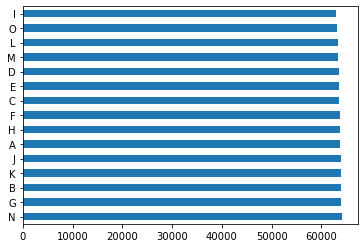

In [3]:
#Creating bins for different sets
bin_names1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
df1['Level']=pd.qcut(df1['time_of_infraction'],15,labels=bin_names1)
#Plotting number of datapoints in each bin.
df1['Level'].value_counts().plot(kind='barh')
E=df1.loc[df1['Level']=='G']
E=E.drop(columns='Level')

In [4]:
X=E.drop(columns=['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume'])
y= E[['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume']]

In [5]:
E

,set_fine_amount,time_of_infraction,Latitude,Longitude,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume,date_of_infraction_year,date_of_infraction_month,date_of_infraction_week,date_of_infraction_day,date_of_infraction_dayofweek,Count Date_year,Count Date_month,Count Date_week,Count Date_day,Count Date_dayofweek,hour_sin,hour_cos
1257,30,1035.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,-3.916394e-15,1.000000
1258,50,1036.0,43.775760,43.775760,13825,534,1970,1,1,1,3,2016,3,12,21,0,2.697968e-01,0.962917
1259,40,1036.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,2.697968e-01,0.962917
1260,40,1037.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,5.195840e-01,0.854419
1261,30,1039.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,8.878852e-01,0.460065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954192,50,1134.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,9.422609e-01,-0.334880
954193,40,1134.0,43.636616,43.636616,5781,1156,1970,1,1,1,3,2012,2,8,22,2,9.422609e-01,-0.334880
954194,50,1134.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,9.422609e-01,-0.334880
954195,50,1134.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,9.422609e-01,-0.334880


In [6]:
#Scaling the bin and obtaining the scores for the pca analysis.
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Importing All major The Necessary Packages
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 
E_index= E.index
EE= StandardScaler().fit_transform(E)
pca = PCA(n_components=3, svd_solver='full')
PC_scores = pca.fit_transform(EE)
scores_pd = pd.DataFrame(data = PC_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index =E_index)

In [7]:
df2 = pd.DataFrame(data = EE,columns = E.columns)

In [21]:
X=df2.drop(columns=['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume'])
y= df2[['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume']]

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [14]:
from sklearn.model_selection import train_test_split
seed = 1
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=test_size, random_state=seed)

In [22]:
import numpy as np
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#cleaning test data
df = df2.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df.values)
df_scaled

array([[0.06666667, 0.        , 0.85449815, ..., 1.        , 0.5       ,
        1.        ],
       [0.11111111, 0.01010101, 0.68883249, ..., 0.        , 0.6352136 ,
        0.98137189],
       [0.08888889, 0.01010101, 0.85449815, ..., 1.        , 0.6352136 ,
        0.98137189],
       ...,
       [0.11111111, 1.        , 0.85449816, ..., 1.        , 0.97223134,
        0.32943737],
       [0.11111111, 1.        , 0.85449816, ..., 1.        , 0.97223134,
        0.32943737],
       [0.22222222, 1.        , 0.85449816, ..., 1.        , 0.97223134,
        0.32943737]])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

In [24]:
# having the dataset as x and y . Making x into a 3-d data and y as 2-d data ie.) reshaping
X_train = []
y_train = []
n_output_steps = 1  # Number of outputs we want to predict into the future
n_input_steps = 1   # Number of past inputs that we want to use to predict the future
for i in range(n_input_steps, len(df_scaled) - n_output_steps +1):
    X_train.append(df_scaled[i - n_input_steps:i, 0:df.shape[1] - 1])
    y_train.append(df_scaled[i + n_output_steps - 1:i + n_output_steps, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print('X_train shape == {}.'.format(X_train.shape))   # no.of samples, no. of time stamps, no. of features
print('y_train shape == {}.'.format(y_train.shape))   # no. of features, no. of output time steps

X_train shape == (64023, 1, 17).
y_train shape == (64023, 1).


In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size=0.2)

In [28]:
X

,set_fine_amount,time_of_infraction,Latitude,Longitude,date_of_infraction_year,date_of_infraction_month,date_of_infraction_week,date_of_infraction_day,date_of_infraction_dayofweek,Count Date_year,Count Date_month,Count Date_week,Count Date_day,Count Date_dayofweek,hour_sin,hour_cos
0,-0.479602,-1.569059,0.677966,0.677966,0.0,0.0,0.0,0.0,0.0,-0.703299,0.365467,0.403399,0.594042,0.834460,-0.077559,1.222196
1,-0.071145,-1.540834,0.049231,0.049231,0.0,0.0,0.0,0.0,0.0,1.788330,-1.143054,-1.148194,-0.128798,-1.902665,0.309235,1.169196
2,-0.275374,-1.540834,0.677966,0.677966,0.0,0.0,0.0,0.0,0.0,-0.703299,0.365467,0.403399,0.594042,0.834460,0.309235,1.169196
3,-0.275374,-1.512609,0.677966,0.677966,0.0,0.0,0.0,0.0,0.0,-0.703299,0.365467,0.403399,0.594042,0.834460,0.667342,1.014129
4,-0.479602,-1.456159,0.677966,0.677966,0.0,0.0,0.0,0.0,0.0,-0.703299,0.365467,0.403399,0.594042,0.834460,1.195357,0.450511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64019,-0.071145,1.225216,0.677966,0.677966,0.0,0.0,0.0,0.0,0.0,-0.703299,0.365467,0.403399,0.594042,0.834460,1.273313,-0.685639
64020,-0.275374,1.225216,-2.012774,-2.012774,0.0,0.0,0.0,0.0,0.0,0.364542,-1.520184,-1.492992,0.015770,-0.990290,1.273313,-0.685639
64021,-0.071145,1.225216,0.677966,0.677966,0.0,0.0,0.0,0.0,0.0,-0.703299,0.365467,0.403399,0.594042,0.834460,1.273313,-0.685639
64022,-0.071145,1.225216,0.677966,0.677966,0.0,0.0,0.0,0.0,0.0,-0.703299,0.365467,0.403399,0.594042,0.834460,1.273313,-0.685639


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
#Variables
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler()
MinMaxScaler()


In [32]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [40]:
from keras.models import load_model
from keras.models import Model
from keras import models, layers
model = Sequential()
model.add(Dense(100, input_dim=16, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(15, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, kernel_initializer='uniform', activation='tanh'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


In [41]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [42]:
history = model.fit(X_train, y_train, epochs=100, batch_size=160,  verbose=1, validation_split=0.2)

Epoch 1/100
241/241 [==============================] - 2s 4ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0506 - val_loss: 0.0058 - val_mse: 0.0058 - val_mae: 0.0437
Epoch 2/100
241/241 [==============================] - 1s 2ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0438 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0433
Epoch 3/100
241/241 [==============================] - 1s 3ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0434 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0426
Epoch 4/100
241/241 [==============================] - 1s 2ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0433 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0425
Epoch 5/100
241/241 [==============================] - 1s 2ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0426 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0427
Epoch 6/100
241/241 [==============================] - 1s 2ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0425 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0424
Epoch 7/10

In [48]:
model.evaluate(X_test, y_test)

501/501 [==============================] - 0s 908us/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0408


[0.004593718331307173, 0.004593718331307173, 0.04076879471540451]

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


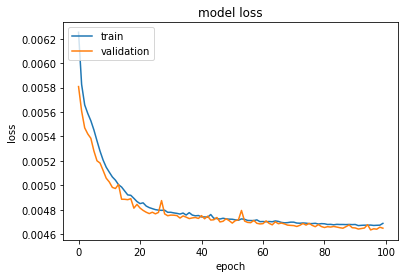

In [43]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [53]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("tanh_LSTM_model.h5")
print("Saved model to disk")

Saved model to disk


In [44]:
from keras import models, layers
model1 = models.Sequential()
model1.add(layers.Dense(300, activation='relu', input_shape=[X_train.shape[1]]))
model1.add(layers.Dense(150, activation='relu'))
model1.add(layers.Dense(75, activation='relu'))
model1.add(layers.Dense(25, activation='relu'))
model1.add(layers.Dense(1, activation='relu'))
# output layer
model1.add(layers.Dense(1))

In [45]:
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [47]:
history = model1.fit(X_train, y_train, validation_split=0.2, epochs=100)


Epoch 1/100
1201/1201 [==============================] - 4s 2ms/step - loss: 0.0061 - mae: 0.0448 - val_loss: 0.0054 - val_mae: 0.0475
Epoch 2/100
1201/1201 [==============================] - 3s 2ms/step - loss: 0.0052 - mae: 0.0425 - val_loss: 0.0054 - val_mae: 0.0418
Epoch 3/100
1201/1201 [==============================] - 3s 2ms/step - loss: 0.0052 - mae: 0.0426 - val_loss: 0.0050 - val_mae: 0.0420
Epoch 4/100
1201/1201 [==============================] - 3s 2ms/step - loss: 0.0049 - mae: 0.0416 - val_loss: 0.0049 - val_mae: 0.0417
Epoch 5/100
1201/1201 [==============================] - 3s 2ms/step - loss: 0.0049 - mae: 0.0418 - val_loss: 0.0049 - val_mae: 0.0415
Epoch 6/100
1201/1201 [==============================] - 3s 2ms/step - loss: 0.0050 - mae: 0.0422 - val_loss: 0.0050 - val_mae: 0.0417
Epoch 7/100
1201/1201 [==============================] - 3s 2ms/step - loss: 0.0049 - mae: 0.0419 - val_loss: 0.0050 - val_mae: 0.0418
Epoch 8/100
1201/1201 [==============================] 

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


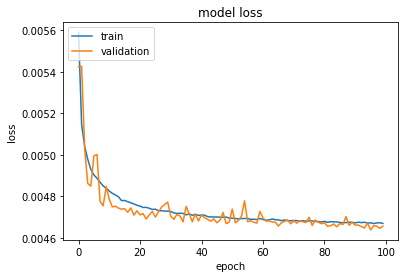

In [50]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [49]:
model1.evaluate(X_test, y_test)

501/501 [==============================] - 0s 960us/step - loss: 0.0046 - mae: 0.0408


[0.004587836563587189, 0.04076556861400604]

In [54]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
# serialize model to JSON
model_json = model1.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("RELU_LSTM_model.h5")
print("Saved model to disk")

Saved model to disk


In [56]:
!pip install eli5

     |████████████████████████████████| 106 kB 6.3 MB/s eta 0:00:01


In [57]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

In [60]:
def base_model():
    model2 = models.Sequential()
    model2.add(layers.Dense(300, activation='relu', input_shape=[X_train.shape[1]]))
    model2.add(layers.Dense(150, activation='relu'))
    model2.add(layers.Dense(75, activation='relu'))
    model2.add(layers.Dense(25, activation='relu'))
    model2.add(layers.Dense(1, activation='relu'))
    return model

In [62]:
param_model = KerasRegressor(build_fn=base_model, epochs=100, batch_size=16, verbose=0)    
param_model.fit(X_test,y_test)

In [63]:
perm = PermutationImportance(model, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f0a8cead898> does not.